Module 2, Lab 1 - Sampling
==========================

In this lab, we will see how random samples (and the data analyses that
come from them) estimate the populations they come from.

This bears repeating: when you are working with a sample of data, you
are using that as an estimate of the population that generated it.

So, how good are your estimations? In working with professionals and
students alike, I tend to find that our human intuitions are often
wrong. However, we can play with sampling ourselves and see the results.

First, we should set the seed. This tells R to use the same random
numbers on your computer as mine, so that we should get the same
results.

In [5]:
set.seed(12345)

To generate a random sample that is normally distributed, we use
`rnorm(n, mean, sd)`. For example, 50 responses from a population with a
mean of 10 and standard deviation of 2 are:

In [6]:
rnorm(50, 10, 2)

[1] 11.171058 11.418932  9.781393  9.093006 11.211775  6.364088 11.260197
 [8]  9.447632  9.431681  8.161356  9.767504 13.634624 10.741256 11.040433
[15]  8.498936 11.633800  8.227285  9.336845 12.241425 10.597447 11.559244
[22] 12.911570  8.711343  6.893725  6.804581 13.610195  9.036705 11.240760
[29] 11.224247  9.675378 11.623746 14.393667 14.098381 13.264891 10.508542
[36] 10.982377  9.351827  6.675900 13.535468 10.051602 12.257022  5.239284
[43]  7.879469 11.874281 11.708903 12.921459  7.173802 11.134807 11.166375
[50]  7.386402

We can also do something similar with a binomial distribution (data can
have two outcomes, such as "like" and "don't like" a product). Here is
the the code: `rbinom(n, size=1, prob)`. The `prob` argument represents
the likelihood of getting a `1` as opposed to a `0`. The size argument
changes the nature of the distribution in a way I won't discuss here. If
we want to simulate 50 responses from a population in which 30% of
people like your product (`1`) and 70% do not (`0`), we use:

In [7]:
rbinom(50, 1, .3)

[1] 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0
[39] 0 1 0 0 0 0 0 1 1 0 1 0

In this case, each `1` represents someone who likes your product and
each `0` represents someone who does not.

There are many distributions we can use with many shapes, including
distributions that have skew, distributions that can resemble counts of
things (e.g., only discrete numbers, most scores zero). We will stick
with these two for this lab.

"Like" vs "Dislike"
===================

Let's try the example above in which each `1` represents someone who
likes your product and each `0` represents someone who does not.

This time, I will run the sample and save the result.

In [8]:
set.seed(12345)
# in R you create a variable with  <-
sample1 <- rbinom(50, 1, .3)

Now we can examine how well our sample did. In this case we *know* the
population value was 30% (because we told R that when we ran the code).
R then collected a random sample of 50 observations from that
population. How close did it get to our true value of 30%?

In [9]:
table(sample1)

sample1
 0  1 
34 16 

We wee here that we got 16 likes and 34 dislikes. We can convert to
percentages by diving by 50 (which we can also get by requesting
`sum(table(sample1)))`:

In [10]:
table(sample1)/50

table(sample1)/sum(table(sample1))

sample1
   0    1 
0.68 0.32 

sample1
   0    1 
0.68 0.32 

Our sample overestimated the number of people who like the product,
returning "32%" instead of 30%.

Because the data are coded `0` and `1`, we can also trick the math into
returning a proportion by using `mean()`:

In [12]:
mean(sample1)

[1] 0.32

Let's try this several times. Every time I run the code, a random sample
will be collected, the proportion of people who like the product
calculated, and reported to you.

In [13]:
mean(rbinom(50, 1, .3))

mean(rbinom(50, 1, .3))

mean(rbinom(50, 1, .3))

mean(rbinom(50, 1, .3))

mean(rbinom(50, 1, .3))

mean(rbinom(50, 1, .3))

[1] 0.38

[1] 0.36

[1] 0.46

[1] 0.3

[1] 0.38

[1] 0.3

We see here that our samples are varying quite a bit. We can run many of
these by using a loop. Let's try this 100 times. I assume you are
familiar with loops in R.

In [14]:
# create container to place results
results <- NULL

# n:m where n is start of range, : is range, m is end
for(i in 1:100){
  results[i] <- mean(rbinom(50, 1, .3))
}

results

[1] 0.34 0.30 0.36 0.30 0.22 0.30 0.38 0.30 0.30 0.20 0.28 0.30 0.18 0.36 0.32
 [16] 0.32 0.40 0.28 0.32 0.28 0.38 0.36 0.34 0.30 0.44 0.38 0.36 0.28 0.24 0.32
 [31] 0.22 0.26 0.30 0.34 0.24 0.24 0.28 0.40 0.42 0.34 0.28 0.30 0.22 0.36 0.28
 [46] 0.26 0.18 0.34 0.20 0.34 0.38 0.34 0.26 0.34 0.32 0.24 0.26 0.32 0.28 0.18
 [61] 0.30 0.22 0.26 0.30 0.22 0.36 0.24 0.26 0.28 0.36 0.32 0.34 0.26 0.30 0.28
 [76] 0.40 0.28 0.32 0.28 0.38 0.36 0.32 0.32 0.18 0.22 0.14 0.34 0.24 0.28 0.34
 [91] 0.28 0.30 0.22 0.22 0.36 0.32 0.28 0.34 0.26 0.34

We see considerable variance in these results. We can histogram them to
see it better:

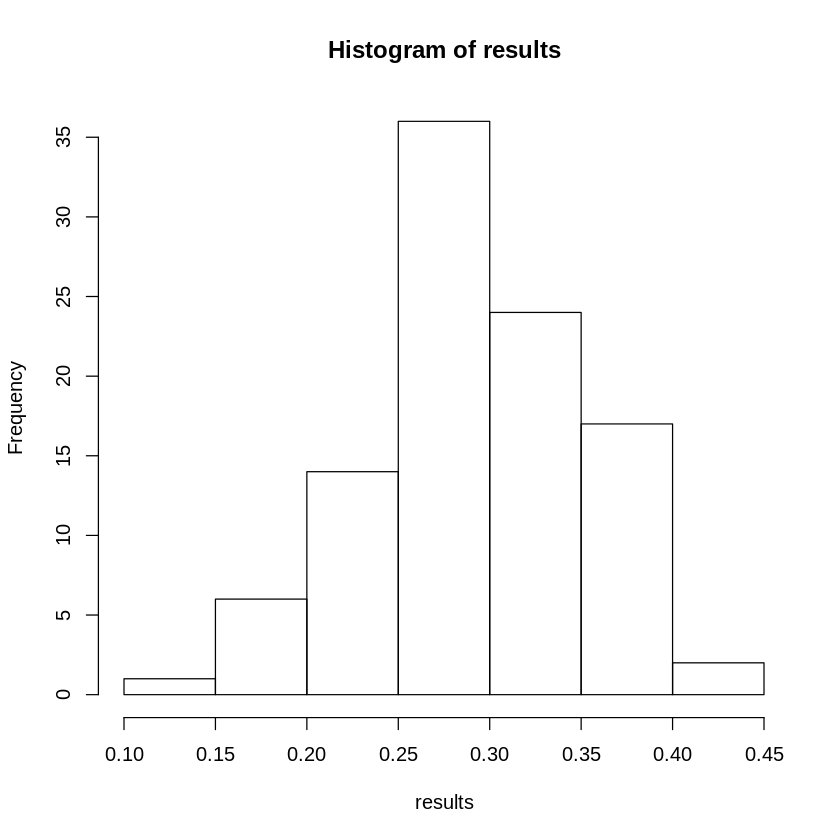

In [15]:
hist(results)

![](Sampling_Lab_files/figure-markdown_strict/unnamed-chunk-10-1.png)

We see here that, on average, random samples are trustworthy--after all,
they are tending to get close to 30%. However, *individual* samples are
less trustworthy. Some results are nearly as large as 45% or as low as
10%. Yikes!

We can also subtract .30 from each score to re-score them as the degree
of error in each sample.

In [16]:
results.error <- results - .30

results.error

[1]  0.04  0.00  0.06  0.00 -0.08  0.00  0.08  0.00  0.00 -0.10 -0.02  0.00
 [13] -0.12  0.06  0.02  0.02  0.10 -0.02  0.02 -0.02  0.08  0.06  0.04  0.00
 [25]  0.14  0.08  0.06 -0.02 -0.06  0.02 -0.08 -0.04  0.00  0.04 -0.06 -0.06
 [37] -0.02  0.10  0.12  0.04 -0.02  0.00 -0.08  0.06 -0.02 -0.04 -0.12  0.04
 [49] -0.10  0.04  0.08  0.04 -0.04  0.04  0.02 -0.06 -0.04  0.02 -0.02 -0.12
 [61]  0.00 -0.08 -0.04  0.00 -0.08  0.06 -0.06 -0.04 -0.02  0.06  0.02  0.04
 [73] -0.04  0.00 -0.02  0.10 -0.02  0.02 -0.02  0.08  0.06  0.02  0.02 -0.12
 [85] -0.08 -0.16  0.04 -0.06 -0.02  0.04 -0.02  0.00 -0.08 -0.08  0.06  0.02
 [97] -0.02  0.04 -0.04  0.04

We see here that most sample scores are within about 5% of the true
population value value. Still, depending on what we want to do with the
data, that could be unacceptably large. The property of samples to
"mis-estimate" the population is called sampling error and it is clearly
a big problem, leading to many a bad decision. The degree to which your
individual samples tend to "mis-estimate" the population (shown above:
`results.error`) is something we want to estimate. Typically, we
quantify this by taking the standard deviation of these errors. This is
called "standard error", and it is a single number, how far "off" our
samples tend to be, on average:

In [17]:
sd(results.error)

[1] 0.05928156

Aha, so we see that the average sample is "off" from the population
value by 6%. Some are "off" by more; some are "off" by less, but the
average sample is off by 6%. In other words, our standard error is 6%.

Fun fact: you can also estimate the standard error with a simple
equation. For binomial data (`0` and `1` scores), the equation is:

$$se = \sqrt{\frac{p\left ( 1-p \right )}{n-1}}$$
 Here, p is the percentage in the population. So, plugging in our
values:

In [18]:
sqrt((.30*(1-.3))/(50-1))

[1] 0.06546537

This is convenient, because it tells us that we don't really need to run
simulations like the above to know how trustworthy our samples are. In
fact, plugging in a reasonable guess for the population value and a
sample size, we can know *before we run a study* how trustworthy a
typical sample will be.

Clearly, a large standard error is a bad thing. We can reduce this
problem by relying on a larger sample. For example, try using a sample
of 700 in the equation for standard error shown previously:

In [19]:
sqrt((.30*(1-.3))/(700-1))

[1] 0.01733289

We see now that the typical sample will be off by only 1.7% from the
population value. We can run a similar loop as done before and see this
in action:

[1] 0.01873208

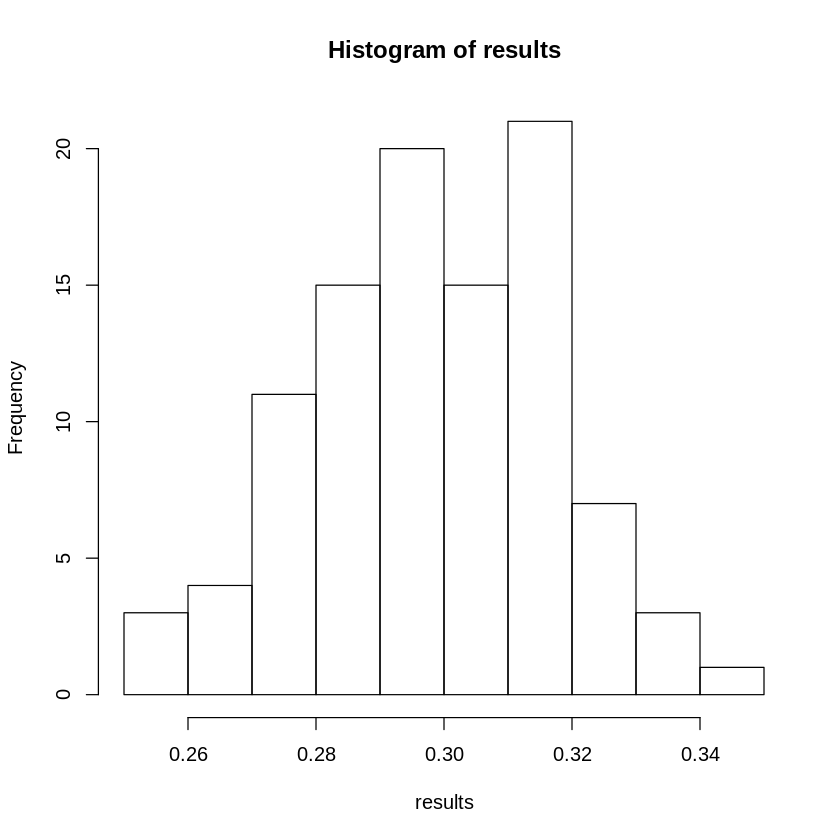

In [20]:
# create container to place results
results <- NULL

for(i in 1:100){
  results[i] <- mean(rbinom(700, 1, .3))
}

sd(results)

hist(results)

![](Sampling_Lab_files/figure-markdown_strict/unnamed-chunk-15-1.png)

We see here, now that most results between 26% and 34%, with the typical
result being "off" by only 1.7%...exactly as our standard error equation
predicted.

Every data situation has a standard error. The point is not to learn a
large number of equations but rather to emphasize the following point:
samples (and the statistics they produce) are flawed estimates of the
population. However, they become more and more accurate as the sample
sizes they are based on increase.

We will discover, soon, that this will give us the concept of
statistical power. Large samples will produce results strong enough that
we can make meaningful statements about the population (in such
situations, we have "good power"), where small samples contain so much
error that we cannot say much meaningful about the population ("weak
power").